# Step 1: Installation and Setup

In [0]:
# Installing TensorFlow
!pip -q install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [0]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10

In [0]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

In [7]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [8]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [9]:
y_train.max(), y_train.min()

(9, 0)

In [10]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [0]:
# Normalizing the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [13]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

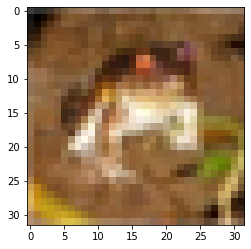

In [14]:
plt.imshow(x_train[0])

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
class_names

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

# Step 3: Building the CNN

In [0]:
# Defining the object
model = tf.keras.models.Sequential()


In [0]:
# Adding first CCN layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape = [32, 32, 3]))

In [0]:
# Adding second CNN layer and maxpool layer
# 1) filters (kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [0]:
# Adding third CNN layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [0]:
# Adding fourth CNN layer and maxpool layer
# 1) filters (kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameters,
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [0]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [0]:
# Adding the Flattening layer
model.add(tf.keras.layers.Flatten())

In [0]:
# Adding first dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [0]:
# Adding second dense layer (output layer)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

# Step 4: Training the model

In [0]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


In [0]:
epochs=10

In [30]:
history=model.fit(x_train, y_train, batch_size=10, epochs=epochs,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 254s 6ms/sample - loss: 1.4274 - sparse_categorical_accuracy: 0.4835 - val_loss: 1.0671 - val_sparse_categorical_accuracy: 0.6199
Epoch 2/10
40000/40000 [==============================] - 252s 6ms/sample - loss: 1.0373 - sparse_categorical_accuracy: 0.6317 - val_loss: 0.8931 - val_sparse_categorical_accuracy: 0.6833
Epoch 3/10
40000/40000 [==============================] - 255s 6ms/sample - loss: 0.8880 - sparse_categorical_accuracy: 0.6887 - val_loss: 0.8618 - val_sparse_categorical_accuracy: 0.6967
Epoch 4/10
40000/40000 [==============================] - 253s 6ms/sample - loss: 0.7985 - sparse_categorical_accuracy: 0.7170 - val_loss: 0.7719 - val_sparse_categorical_accuracy: 0.7233
Epoch 5/10
40000/40000 [==============================] - 255s 6ms/sample - loss: 0.7246 - sparse_categorical_accuracy: 0.7444 - val_loss: 0.7730 - val_sparse_categorical_accuracy: 0.7319
Epoch 6/10

# Step 5: Model evaluation and prediction

In [29]:
# evaluate the model performane
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 15s 1ms/sample - loss: 2.3104 - sparse_categorical_accuracy: 0.0937


In [31]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuracy is: 0.09369999915361404


In [0]:
# Predictions
y_pred = model.predict_classes(x_test)

In [33]:
print(y_pred[0]), print(y_test[0])

3
[3]


(None, None)

In [35]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[848  11  29  10  21   4   5  16  32  24]
 [ 23 862   0   4   1   5   6   5  14  80]
 [ 93   4 553  28 151  65  46  37  13  10]
 [ 51  13  59 426 102 210  53  58  13  15]
 [ 22   4  38  31 766  23  23  88   4   1]
 [ 21   2  41 117  60 656  12  76   8   7]
 [  9   5  45  30  87  32 760  19   8   5]
 [ 20   2  23  16  55  42   8 829   1   4]
 [ 96  31  16   7   4   1   3   6 804  32]
 [ 48  61   5   6   7   4   0  20  12 837]]


In [36]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.7341


In [0]:
# learning curve based on history
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


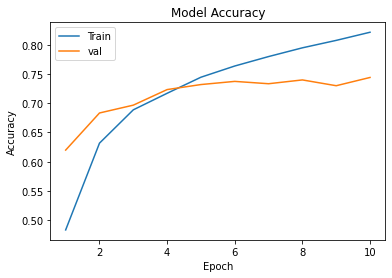

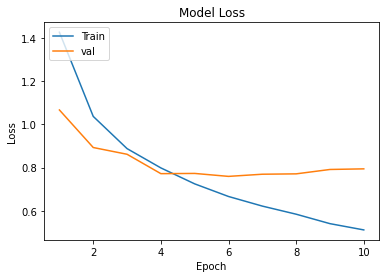

In [40]:
# plot the learning curve for uncalibrated data
learning_curve(history, epochs)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


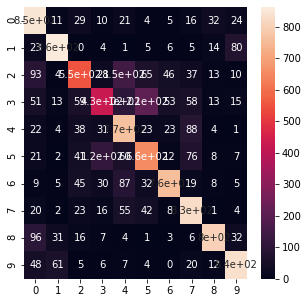

In [41]:
import seaborn as sns
# heat map of data
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)